## Exercise 1 - pandas repetition

### 1. Working with grades data
##### The dataset is called betyg_o_prov_riksnivå.xlsx

##### a) Draw a line chart for proportion of students that are missing approved grade for one or more subjects for the years 18-23.

In [2]:
# a) Start with reading in the file data/betyg_o_prov_riksnivå.xlsx
# and the sheets with different tables.

import pandas as pd

national_grades_file_path = "data/betyg_o_prov_riksnivå.xlsx"

sheet_names = pd.ExcelFile(national_grades_file_path).sheet_names
sheet_names

['Tabell 1A', 'Tabell 1B', 'Definitioner']

In [3]:
# iterate through names
# read each sheet into a separate dataframe
df_table1B = pd.read_excel(
        national_grades_file_path, skiprows=7, sheet_name=sheet_names[1]
        )

df_table1B.keys()

Index(['Unnamed: 0', 'Totalt', 'Flickor', 'Pojkar', 'Totalt.1', 'Flickor.1',
       'Pojkar.1', 'Totalt.2', 'Flickor.2', 'Pojkar.2'],
      dtype='object')

In [4]:
df_table1B

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3


In [5]:
# change names of columns
# was:
# ['Unnamed: 0', 'Totalt', 'Flickor', 'Pojkar', 'Totalt.1', 'Flickor.1',
#       'Pojkar.1', 'Totalt.2', 'Flickor.2', 'Pojkar.2'] 

# "total_avg_merit_16_subjects"
# "total_avg_merit_17_subjects"
# "percentage_missing_grade"

df_table1B.rename(
        {"Unnamed: 0" : "Läsår/Huvudman/Bakgrund", 
         "Totalt" : "total_avg_merit_16_subjects",
         "Flickor": "girls_avg_merit_16_subjects",
         "Pojkar" : "boys_avg_merit_16_subjects",
         "Totalt.1" : "total_avg_merit_17_subjects",
         "Flickor.1": "girls_avg_merit_17_subjects",
         "Pojkar.1" : "boys_avg_merit_17_subjects",
         "Totalt.2" : "total_percentage_missing_grade",
         "Flickor.2": "girls_percentage_missing_grade",
         "Pojkar.2" : "boys_percentage_missing_grade",
         },
         inplace=True, axis=1
        )

df_table1B.head()


,Läsår/Huvudman/Bakgrund,total_avg_merit_16_subjects,girls_avg_merit_16_subjects,boys_avg_merit_16_subjects,total_avg_merit_17_subjects,girls_avg_merit_17_subjects,boys_avg_merit_17_subjects,total_percentage_missing_grade,girls_percentage_missing_grade,boys_percentage_missing_grade
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [6]:
subset_df_table1B = df_table1B[["Läsår/Huvudman/Bakgrund","total_percentage_missing_grade","girls_percentage_missing_grade","boys_percentage_missing_grade"]].iloc[0:5]

In [7]:
subset_df_table1B

,Läsår/Huvudman/Bakgrund,total_percentage_missing_grade,girls_percentage_missing_grade,boys_percentage_missing_grade
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


[Text(0.5, 0, 'school year'), Text(0, 0.5, 'percentage')]

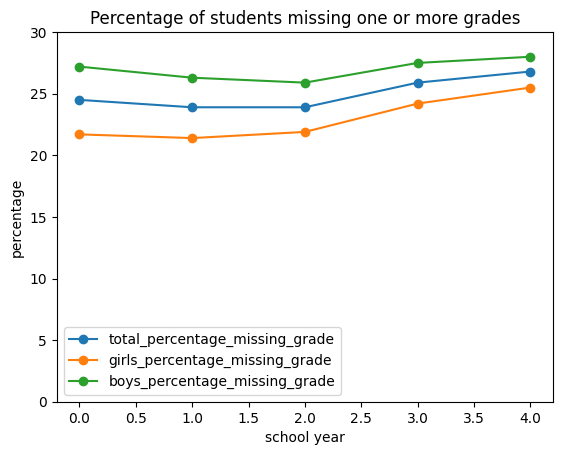

In [8]:
ax = subset_df_table1B.plot(
    kind = "line",  
    marker='o', 
    title="Percentage of students missing one or more grades",
    ylim=(0,30))
ax.set(xlabel = "school year", ylabel = "percentage")

#####  b) Examine other variable(s) of your choice and check how they affect the students grade. 
###### How "föräldrarnas utbildningsbakgrund" impacts students grades.

In [9]:
df_table1B.columns

Index(['Läsår/Huvudman/Bakgrund', 'total_avg_merit_16_subjects',
       'girls_avg_merit_16_subjects', 'boys_avg_merit_16_subjects',
       'total_avg_merit_17_subjects', 'girls_avg_merit_17_subjects',
       'boys_avg_merit_17_subjects', 'total_percentage_missing_grade',
       'girls_percentage_missing_grade', 'boys_percentage_missing_grade'],
      dtype='object')

In [15]:
b_subset_df_table1B = df_table1B[['Läsår/Huvudman/Bakgrund', 'total_avg_merit_16_subjects',
       'girls_avg_merit_16_subjects', 'boys_avg_merit_16_subjects',
       'total_avg_merit_17_subjects', 'girls_avg_merit_17_subjects',
       'boys_avg_merit_17_subjects']]

In [29]:
final_b_subset_df_table1B = b_subset_df_table1B.iloc[22:25].copy(deep=True)



final_b_subset_df_table1B.rename(
        {"Läsår/Huvudman/Bakgrund" : "Parents education level" 
         },
         inplace=True, axis=1
        )

In [30]:
final_b_subset_df_table1B 

,Parents education level,total_avg_merit_16_subjects,girls_avg_merit_16_subjects,boys_avg_merit_16_subjects,total_avg_merit_17_subjects,girls_avg_merit_17_subjects,boys_avg_merit_17_subjects
22,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3
23,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3
24,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6


In [32]:
total_merit_b_subset_df_table1B = final_b_subset_df_table1B[
    ['Parents education level', 
     'total_avg_merit_16_subjects',
     'total_avg_merit_17_subjects']
     ]

**pandas plot() method**

[Text(0.5, 0, 'parents education level'), Text(0, 0.5, 'merti points')]

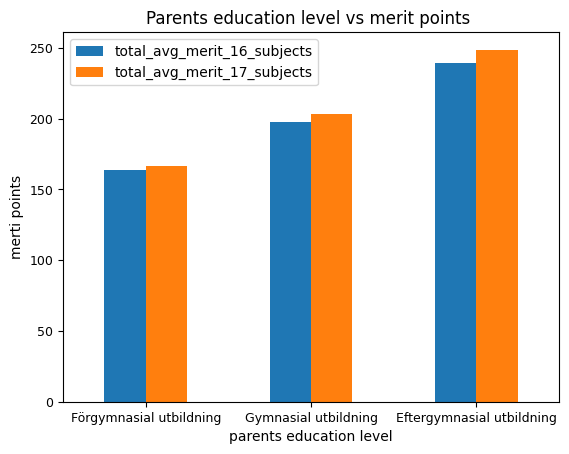

In [51]:
ax = total_merit_b_subset_df_table1B.plot(
    x = 'Parents education level',
    kind = "bar",  
    title = "Parents education level vs merit points ",
    rot = 0,
    fontsize = 9
    )
ax.set(xlabel = "parents education level", 
       ylabel = "merti points")
